## Assignment 3 Part 1 - Statistical Inference

### **Importing Libraries**

In [205]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
import matplotlib.pyplot as plt
plots.style.use('fivethirtyeight')

In [206]:
# Initialize Otter
import otter
grader = otter.Notebook()

## **Assignment Instructions**

* **How to install 'otter'**: Run `pip install otter-grader` in your Anaconda Command Prompt
* **Otter**: It is an autograder that we will be using for grading your notebooks.
* **grader.check('qn')**: This command runs test cases for nth question `qn` provided to you and displays the result. But these are not the only test cases, these are provided just for your basic testing. There will be some *hidden test cases* on which your answers will be tested as well.
* You are **not** allowed to edit any pre-defined variables and as per the instructions for every question you have to assign your answers to these variables.
* Store your answers in the variables already defined at the end of each question. (These variables are followed by "...")

# **Submission Instructions**

* There are two parts of this assignment. You should name both notebooks as **YourRollNumber_PartNumber.ipynb**. (e.g. this part should be named as *`2XXXXXXX_1.ipynb`*)
* You must submit a zip file containg just two notebooks and it must not has any folder or any other file. 
* The name of the zip file must be your `Roll Number`

### **Indian Liver Patient Records**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

This data set contains 416 liver patient records and 167 non liver patient records collected from India. The "Outcome" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Run the cell below to load the dataset and explore its attributes for a study conducted for 583 patients.

### **Loading Data**

In [207]:
df = pd.read_csv('indian_liver_patient_dataset.csv')
df = df.dropna()
df = df.reset_index()
df

,index,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
0,0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...,...
574,578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
575,579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
576,580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
577,581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


Columns:
<br>
Age of the patient <br>
Gender of the patient<br>
Total Bilirubin : Liver function marker<br>
Direct Bilirubin: Liver function marker<br>
Alkaline Phosphotase: Liver function marker<br>
Alamine Aminotransferase: Liver function marker<br>
Aspartate Aminotransferase: Liver function marker<br>
Total Protiens : Total Protein level<br>
Albumin<br>
Albumin and Globulin Ratio<br>
Outcome: field used to split the data into two sets (patient with liver disease =1, or no disease =2)<br>

This data has been cleaned to remove any nulll values so that there are none. Therefore, the data's rows may be lesser than the original study that was conducted.

**Question 1**: Print the dataset's description in the following cell and check whether any null values exist. (3)

In [208]:
print('number of null values = ', df.isnull().sum().sum())
df.describe()

number of null values =  0


,index,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,291.257340,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,168.966657,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,0.000000,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,144.500000,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,292.000000,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,437.500000,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,582.000000,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### Liver Disease and the population

In this section, we will be exploring whether this dataset is a representative sample of population by examining the patients under this survey. This will help us highlights the limitations of the dataset.

According to the NCBI
(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5658106/), the prevalence of diagnosed liver disease (i.e., the proportion of the population who have it) in India around this time was 0.013. We are going to conduct a hypothesis test with the following null and alternative hypotheses:

**Null Hypothesis**: The probability that a participant within this study has liver disease is equivalent to the prevalence of diagnosed liver disease within the population. (i.e., any difference between the study prevalence and population prevalence is due to random chance in the selection of the participants).

**Alternative Hypothesis**: The probability that a participant within the study has liver disease is different than the prevalence of diagnosed liver disease within the population.

We are going to use the absolute distance between the observed prevalence and the true population prevalence as our test statistic. 

**Question 2**: What is the observed value of the statistic in the data from the Indian Liver Patient Dataset? (5)

In [209]:
counts = df['Outcome'].value_counts()

observed_prevelance = (counts.iloc[0] / 583).item()
observed_liverdisease_distance = observed_prevelance - 0.013

In [210]:
grader.check("q2")

q2 results: All test cases passed!

**Question 3**: Make a function that returns a simulated statistic under the null hypothesis. Use the function to return exactly one simulated statistic under the null hypothesis. Remember that our statistic is the absolute distance between the observed prevalence and the true population prevalence.(7)

**Hint:** Look into the [np.random.multinomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html) function for simulating the statistic.

In [211]:
liverdisease_proportion = [0.987,.013]

def liverdisease_statistic():
    simulated_stat = np.random.multinomial(df.shape[0], liverdisease_proportion)
    simulated_stat = simulated_stat[1] / df.shape[0]   
    return abs(simulated_stat - 0.013)

x = liverdisease_statistic()
x

0.0025440414507772024

In [212]:
grader.check("q3")

q3 results: All test cases passed!

**Question 4**: Use this function to simulate 10000 values of the statistic under null hypothesis. Append these simulated values in the "liverdisease_simulated_stats" list. (7)

In [213]:
liverdisease_simulated_stats = []

for i in np.arange(10000): 
    simulated_stat = liverdisease_statistic()
    liverdisease_simulated_stats.append(simulated_stat)
    
liverdisease_simulated_stats

[0.004364421416234887,
 0.0009101899827288415,
 0.0008169257340241796,
 0.0009101899827288415,
 0.004271157167530225,
 0.005998272884283248,
 0.009545768566493956,
 0.0025440414507772024,
 0.004271157167530225,
 0.004271157167530225,
 0.00609153713298791,
 0.007818652849740933,
 0.004271157167530225,
 0.004271157167530225,
 0.0026373056994818643,
 0.0008169257340241796,
 0.0025440414507772024,
 0.004271157167530225,
 0.0008169257340241796,
 0.004364421416234887,
 0.0025440414507772024,
 0.0008169257340241796,
 0.004271157167530225,
 0.00609153713298791,
 0.0026373056994818643,
 0.0009101899827288415,
 0.004364421416234887,
 0.0026373056994818643,
 0.009545768566493956,
 0.0009101899827288415,
 0.0009101899827288415,
 0.0026373056994818643,
 0.00609153713298791,
 0.004364421416234887,
 0.0009101899827288415,
 0.0008169257340241796,
 0.007818652849740933,
 0.007725388601036271,
 0.0025440414507772024,
 0.005998272884283248,
 0.005998272884283248,
 0.005998272884283248,
 0.004271157167530

In [214]:
grader.check("q4")

q4 results: All test cases passed!

**Question 5**: Generate a histogram of the simulated values of your statistic, along with the observed value. Label Histogram axes correctly.(4)

*Explain what this histogram displays.*

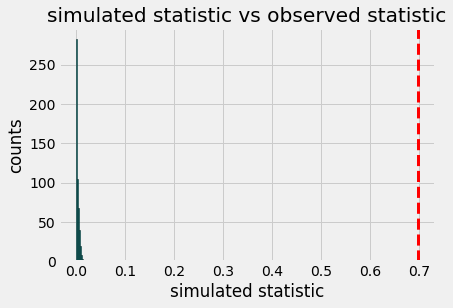

In [215]:
#Solution
result = plt.hist(liverdisease_simulated_stats, density=True, color='c', edgecolor='k')
plt.xlabel('simulated statistic')
plt.ylabel('counts')
plt.title('simulated statistic vs observed statistic')
plt.axvline(observed_liverdisease_distance, color='red', linestyle='dashed', linewidth=3)

The histogram displays the simluated statistics on x axis and their counts on y axis, basically it shows how the simulated values of statistic are distributed and it also displays the observed statistic in the form of red line so visual comparison can be done. Most of the values of simulated statistic are around 0 while observed statistic lies around 0.7.

**Question 6**: Based on the results of the test and the empirical distribution of the test statistic under the null, should you reject the null hypothesis? (2)

Yes, we should reject the null hypothesis because the values of simulated test statistics are too far left of the observed test statistic

**Few Descriptive Questions regarding Sampling/Re-sampling** Please re-visit the concepts of bootstrap sampling and other sampling techniques before doing the next question.

**Question 7 (a):** Why does the resampling distribution of the difference in means approach a normal distribution? (1)

It does because of the central limit theorem, which states that regardless of the distribution of population, the sampling distribution will always approach a normal distribution

**Question 7 (b):** Write 3 advantages and 3 disadvantages of using the bootstrap sampling method? List them down. (3)

Advantages:
1) It can be difficult and expensive to get a lot of samples from population. Hence, with bootstrap sampling only one sample is needed thereby, reducing the costs and resources required.
2) It is a very simple method to find the estimates of confidence intervals and standard errors 
3) Bootstrapping is fairly consistent and more accurate than using standard intervals

Disadvantages:
1) Large sample required, otherwise bootstrap may not be appropriate for small sample sizes
2) If the parameter that is being estimated is greatly affected by rare elements than bootstrap may not give accurate results
3) Bootstrap may not give accurate results if very high or very low percentiles are being estimated

**Question 8:** Sample 100 instances from the dataset with replacement and print their description. (2)

In [216]:
#solution
sample = df.sample(100, replace=True)
sample.describe()

,index,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Outcome
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,287.780000,43.200000,4.223000,1.986000,274.510000,73.680000,90.860000,6.457000,3.180000,0.953700,1.290000
std,160.569037,16.738633,7.358358,3.749344,160.213966,120.253762,122.952567,1.118644,0.818474,0.294908,0.456048
min,7.000000,4.000000,0.400000,0.100000,63.000000,12.000000,11.000000,3.600000,1.400000,0.350000,1.000000
25%,163.500000,32.000000,0.800000,0.200000,178.750000,26.000000,26.750000,5.675000,2.700000,0.800000,1.000000
50%,304.500000,42.000000,0.950000,0.300000,208.000000,35.500000,49.000000,6.450000,3.150000,1.000000,1.000000
75%,412.500000,55.500000,2.950000,1.375000,302.500000,71.250000,90.500000,7.100000,3.725000,1.100000,2.000000
max,579.000000,75.000000,42.800000,19.700000,862.000000,875.000000,731.000000,9.200000,5.500000,1.700000,2.000000


**Question 9:** Make a function that generates the mean "Total Protein"  level of the 100 patients you sampled above. Generate the mean for 1000 samples and append all values to an array/list (5)

In [217]:
#Calculate mean of sampled data from last question
org_mean = sample['Total_Protiens'].mean()

In [218]:
#Create function (Generate the mean for 1000 samples and append all values to an array/list)
def generateMean():
    mean_list = []
    for i in range(1000):
        s = df.sample(n=100, replace=True)
        mean = s['Total_Protiens'].mean()
        mean_list.append(mean)
    
    return mean_list

**Question 10:** Call the function above and generate a histogram of the simulated values of your statistic. Also show the original mean as a line drawn on your graph. (5)

*Explain what this histogram displays or any observations you make.*

Text(0, 0.5, 'Proportion')

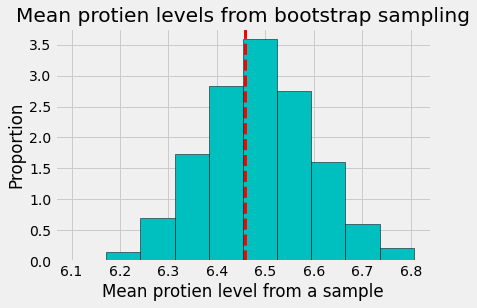

In [219]:
#solution
simulated_vals = generateMean()
result = plt.hist(simulated_vals, density=True, color='c', edgecolor='k')
plt.axvline(org_mean, color='red', linestyle='dashed', linewidth=3)
plt.title('Mean protien levels from bootstrap sampling')
plt.xlabel('Mean protien level from a sample')
plt.ylabel('Proportion')

The histogram shows the distribution of mean protien levels of the 1000 samples from bootstraping. On x axis are the mean protien levels while on y axis are the proportions. The red dotted line indicates that mean level protien of the original sample from which bootstraping was done. It is evident that most of the means from bootstraping are similar to the mean of acutal sample.

**Question 11:** Print the bootstrap approximated 95% confidence interval for the mean "Total Protein" level of the dataset. (5)

In [220]:
#confidence_interval = [left,right]
confidence_interval = (np.percentile(simulated_vals, 2.5), np.percentile(simulated_vals, 97.5))
print("bootstrap approximated 95% confidence interval is :",confidence_interval)

bootstrap approximated 95% confidence interval is : (6.258975000000001, 6.693)


In [221]:
grader.check("q11")

q11 and q9 results: All test cases passed!